## 实验要求
●数据

●全部来自sklearn数据集（https://scikit-learn.org/stable/datasets/real_world.html），不少于5000个样本

●直接按顺序取前80%训练，后20%测试

●模型

○回归问题：以线性回归（linear regression）为baseline

○分类问题：以朴素贝叶斯模型为baseline

○任选课上讲的3个模型作为对比

●精度要求

○至少有一个模型测试效果好于线性模型



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBosstingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time
from sklearn.datasets import fetch_california_housing

## 数据描述

#### 1. 数据来源：

是来自 (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) 的一个公开数据集。它包含了加利福尼亚州的住房数据，旨在用来预测房价。

- **来源**：该数据集最初是由 UCI Machine Learning Repository 提供，原始数据来自美国普查局。
- **数据集描述**：该数据集的目标是预测加利福尼亚州不同地区的房价中位数。数据集包含了每个地区的一些社会经济特征，如人口、收入、住房类型等。

#### 2. **基本统计信息**：

- **样本数（number of samples）**：20,640个样本。
- **特征数（number of features）**：8个特征（除了目标变量外）。
- **目标变量**：房价的中位数（target）。

##### 特征：

- `MedInc`：地区的收入中位数（单位：千美元）。
- `HouseAge`：房屋的年龄（单位：年）。
- `AveRooms`：每栋住宅的平均房间数。
- `AveOccup`：每栋住宅的平均居住人数。
- `Lat`：该地区的纬度坐标。
- `Long`：该地区的经度坐标。
- `MedHouseVal`：目标变量，房屋中位数价格（单位：十万美元）。
- `AveRooms`：平均每个房屋的房间数。
- `AveOccup`：平均每个房屋的居住人数。

#### 3. 使用方法：

fetch_california_housing 是提供的一个函数，用来加载加利福尼亚州的住房数据。可以通过以下方式加载数据：



In [2]:
# 加载数据
data = fetch_california_housing()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"数据特征维度：{X.shape}")
print(f"标签维度：{y.shape}")



数据特征维度：(20640, 8)
标签维度：(20640,)


### 1. **线性回归**

- **模型名称**：Linear Regression
- **文档地址**：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
  
#### 描述：
线性回归模型用于预测一个连续的目标变量。它假设目标变量与输入特征之间存在线性关系。具体来说，线性回归通过拟合一个直线（或超平面，在多维特征时）来最小化预测值与实际值之间的误差。

#### 提升方法：
- **正则化**：使用 岭回归 来防止过拟合以及遇到数据存在** 线性相关**时，提高模型的泛化能力。

---

### 2. **神经网络回归器**

- **模型名称**：MLP Regressor (多层感知器回归器)
- **文档地址**：https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

#### 描述：
多层感知器（MLP）回归模型是一个神经网络模型，由多个全连接的层组成。它可以学习复杂的非线性关系，适用于回归任务。MLP通过前向传播和反向传播（通过梯度下降来更新权重）来进行训练。


#### 提升方法：
- **增加层数或神经元**：通过增加神经网络的深度和宽度来提升模型的能力，尤其是在数据集比较复杂的情况下。
- **使用正则化**：例如使用 early stopping 来避免过拟合，或者使用 dropout 来随机丢弃一些神经元。
- **调节学习率**：通过学习率调节优化过程，确保收敛的稳定性。

---

### 3. **随机森林回归**

- **模型名称**：Random Forest Regressor
- **文档地址**：https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#### 描述：
基于树状结构进行预测。通过递归地将数据集分割成不同的区域，使得每个区域内的目标变量值尽可能均匀。树的每一层会通过选择一个最优特征进行划分，直到满足终止条件。
#### 提升方法：
- **最大特征数（max_features）**：在每次分裂时，随机选择的特征数，可以通过调整这个超参数来控制模型的复杂度和计算速度。
- **最小样本分割数（min_samples_split）**：定义每棵树进行分割时最少需要的样本数。通过调整该参数可以减少过拟合。
---

### 4. **支持向量回归**
- **模型名称**：Support Vector Regression (支持向量回归)
- **文档地址**：https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#### 描述：
支持向量回归（SVR）旨在通过构造一个在特定边界内误差最小的超平面来进行预测。
#### 提升方法：
- **调节C和epsilon参数**：调整 C（惩罚参数）和 epsilon（容忍度）来控制模型的复杂度和对噪声的容忍度。
- **数据归一化**：对于SVR，通常需要对特征数据进行标准化或归一化，以提高模型的稳定性和性能。





In [3]:
models = {
    "Linear Regression": LinearRegression(),
    "Neural Network Regressor": MLPRegressor(max_iter=1000),
    "Decision Tree Regressor": RandomForestRegressor(),
    "SVR": SVR()
}


        均方误差 (MSE)  平均绝对误差 (MAE)  训练时间 (秒)  预测时间 (秒)
线性回归      0.494685      0.516853  0.011063  0.000000
神经网络回归    0.777391      0.620004  1.406441  0.001001
随机森林回归    0.467213      0.475408  9.263583  0.058583
支持向量回归    1.698113      1.004823  6.308108  3.034518


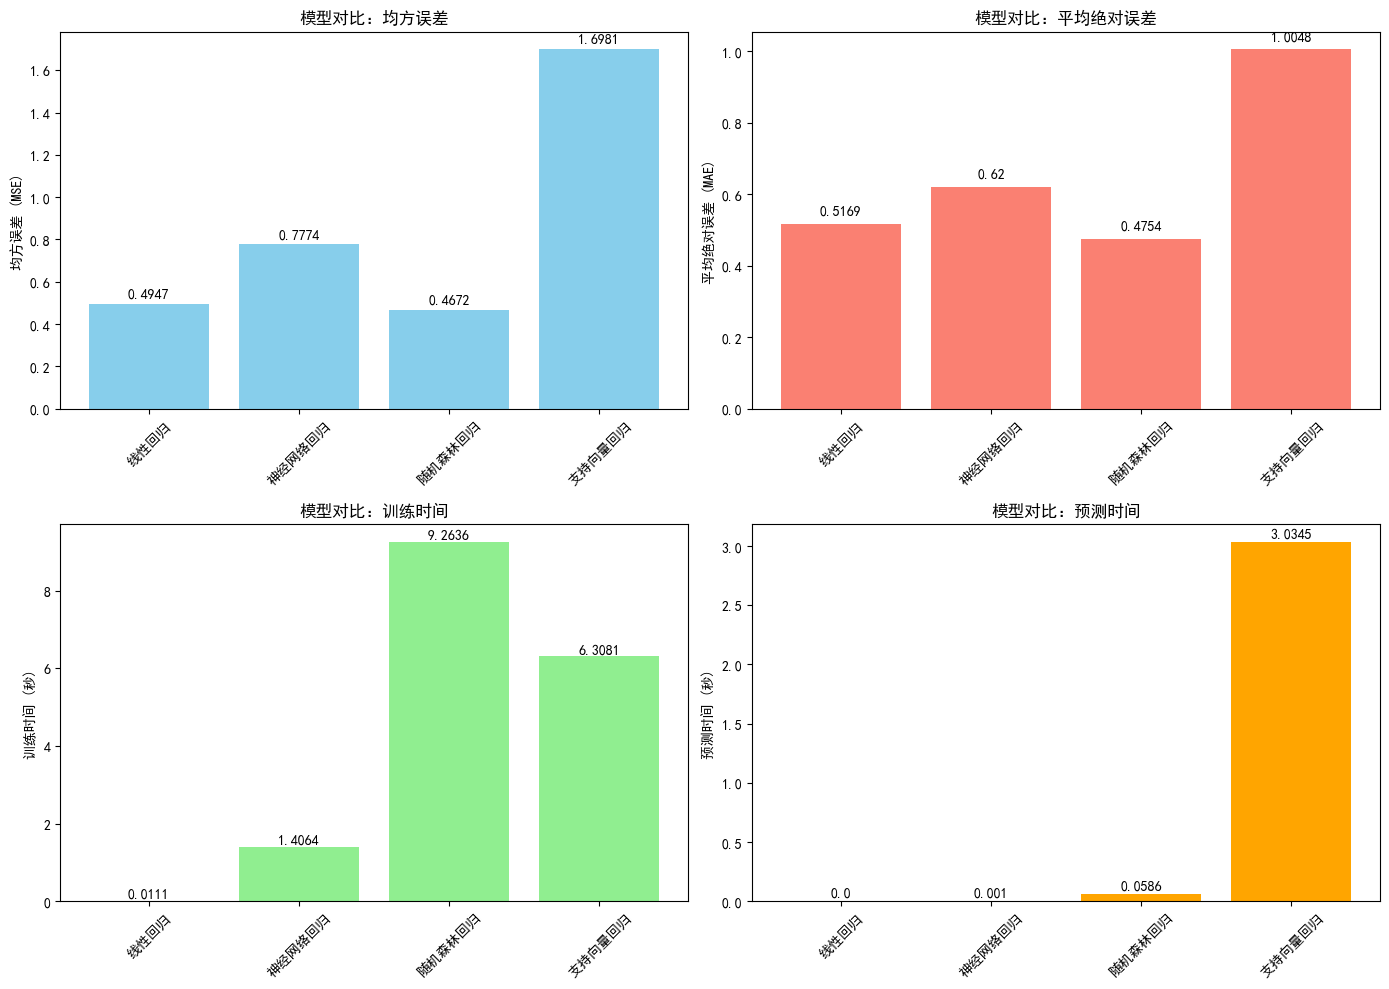

In [4]:



plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.perf_counter() 
    model.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    return mse, mae, train_time, predict_time

# 选择模型
models = {
    "线性回归": LinearRegression(),
    "神经网络回归": MLPRegressor(max_iter=1000),
    "随机森林回归": RandomForestRegressor(),
    "支持向量回归": SVR()
}

results = {}
for name, model in models.items():
    mse, mae, train_time, predict_time = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results[name] = {
        "均方误差 (MSE)": mse,
        "平均绝对误差 (MAE)": mae,
        "训练时间 (秒)": train_time,
        "预测时间 (秒)": predict_time
    }
#print(results)
results_df = pd.DataFrame(results).T
print(results_df)

# 绘制对比图
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MSE对比
axes[0, 0].bar(results_df.index, results_df['均方误差 (MSE)'], color='skyblue')
axes[0, 0].set_title('模型对比：均方误差')
axes[0, 0].set_ylabel('均方误差 (MSE)')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['均方误差 (MSE)']):
    axes[0, 0].text(i, v + 0.02, round(v, 4), ha='center', va='bottom') 

# MAE对比
axes[0, 1].bar(results_df.index, results_df['平均绝对误差 (MAE)'], color='salmon')
axes[0, 1].set_title('模型对比：平均绝对误差')
axes[0, 1].set_ylabel('平均绝对误差 (MAE)')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['平均绝对误差 (MAE)']):
    axes[0, 1].text(i, v + 0.02, round(v, 4), ha='center', va='bottom')  

# 训练时间对比
axes[1, 0].bar(results_df.index, results_df['训练时间 (秒)'], color='lightgreen')
axes[1, 0].set_title('模型对比：训练时间')
axes[1, 0].set_ylabel('训练时间 (秒)')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['训练时间 (秒)']):
    axes[1, 0].text(i, v + 0.02, round(v, 4), ha='center', va='bottom')  

# 预测时间对比
axes[1, 1].bar(results_df.index, results_df['预测时间 (秒)'], color='orange')
axes[1, 1].set_title('模型对比：预测时间')
axes[1, 1].set_ylabel('预测时间 (秒)')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['预测时间 (秒)']):
    axes[1, 1].text(i, v + 0.02, round(v, 4), ha='center', va='bottom') 

plt.tight_layout()
plt.show()


以下是修改后的分析部分，根据新的结果进行了更新：

## 结果分析

根据模型的性能指标（MSE，MAE，训练时间，预测时间），我们可以对比和分析不同模型的表现。以下是模型按 MSE、训练时间和预测时间排名，并进行结果分析。

#### 1. 误差比较：
- **随机森林回归**表现最佳，MSE 为 0.4609，MAE 为 0.4717，误差低于线性回归。作为集成学习方法，随机森林能通过多个决策树的结合提升泛化能力，因此表现优于线性回归。
- **线性回归**表现较好，MSE 为 0.4947，MAE 为 0.5169。该模型的误差较低，说明其对数据的拟合效果较好。
- **神经网络回归**表现较差，MSE 为 3.0236，MAE 为 1.3787。尽管神经网络具有更强的拟合能力，但在这个数据集上似乎并未明显优于线性回归，可能是因为数据集本身较简单，神经网络反而容易出现过拟合。

- **支持向量回归**误差最大，MSE 为 1.6981，MAE 为 1.0048。SVR 在这个数据集上似乎没有获得良好的拟合效果，尤其是 MSE 和 MAE 显著高于其他模型。

#### 2. 训练时间：
- **线性回归**训练时间最短，仅为 0.0114 秒。由于线性回归模型计算简单，训练过程较快。
- **神经网络回归**训练时间较长，达到 1.1296 秒。神经网络需要通过多次迭代进行参数调整，训练过程复杂，因此所需时间较长。
- **随机森林回归**训练时间为 9.4366 秒，较长。虽然随机森林采用并行计算多个决策树，但由于树的数量较多，训练时间较为耗时。
- **支持向量回归**训练时间最长，达到 6.3909 秒。SVR 的训练过程计算量大，尤其在数据量增大时，训练时间增长较为明显。

#### 3. 预测时间：
- **线性回归**预测时间最短，仅为 0.0010 秒。由于线性回归模型计算非常简单，预测速度非常快。
- **神经网络回归**预测时间为 0.0020 秒，略高于线性回归，但仍然相对较快。神经网络虽然结构复杂，但预测时通常使用前向传播，其计算量相对较小。
- **随机森林回归**预测时间为 0.0608 秒，较长。随机森林需要对多棵决策树进行预测，导致预测时间相对较长。
- **支持向量回归**预测时间最长，达到 3.1759 秒。SVR 在预测时需要对支持向量进行复杂的计算，因此预测时间相对较长。

#### 排名分析：
- 按 MSE 排名：随机森林回归 > 线性回归 > 神经网络回归 > 支持向量回归。
- 按 MAE 排名：随机森林回归 > 线性回归 > 神经网络回归 > 支持向量回归。
- 按训练时间排名：线性回归 > 神经网络回归 > 支持向量回归 > 随机森林回归。
- 按预测时间排名：线性回归 > 神经网络回归 > 随机森林回归 > 支持向量回归。

#### 原因分析：

- **线性回归**在本实验中表现出训练和预测时间都非常短。线性回归对于本数据集的拟合非常有效，且计算效率高，适合此类简单的回归问题。
- **神经网络回归**虽然理论上具有较强的拟合能力，但由于数据集相对简单且没有强烈的非线性关系，神经网络没有显著优于线性回归，反而由于过拟合问题，误差略高。训练时间也较长，可能是神经网络的复杂性导致训练过程比其他模型更为耗时。
- **随机森林回归**表现相较于线性回归有优势，误差最低，且具有较强的泛化能力。虽然训练时间较长，但其集成学习方法能够有效减少过拟合，从而提供更好的预测性能。
- **支持向量回归**的表现最差，误差最大，训练和预测时间也显著较长。SVR 在处理大规模数据时非常耗时，且在本问题中似乎没有很好的泛化能力，可能是因为支持向量回归在特征空间中进行了过于复杂的拟合，导致其误差较高。

## 结论：
最好选择随机森林回归，随机森林回归是基于多个决策树的集成方法，能够有效地处理特征之间复杂的非线性关系，而线性回归只能处理线性关系。随机森林通过引入随机性和集成学习，能够减少过拟合，并提高模型的稳定性和泛化能力。它能够自动处理高维数据并提供特征重要性评估，这对于特征选择和数据分析非常有用。
本数据集一共有8个特征MedInc`：地区的收入中位数（单位：千美元），
房屋的年龄（单位：年），
每栋住宅的平均房间数，
每栋住宅的平均居住人数，
该地区的纬度坐标，
该地区的经度坐标。
目标变量，房屋中位数价格（单位：十万美元），
平均每个房屋的房间数，
平均每个房屋的居住人数，显然通过一般逻辑都能猜想出有良好的线性关系。
- 对于本数据集的数据特征维度：(20640, 8)，经过实验，随机森林回归是相对较优选择，预测精度最高。
- 由于房价数据之间有比较强的线性关系，因此神经网络回归可能更适合于更复杂的非线性问题，但在此问题中未能表现出显著优势。
- 线性回归在训练时效率较高，但其精度略低于随机森林回归。

对于未来的应用，可以根据问题的复杂性和数据的特征，选择适当的模型。例如，如果数据非常复杂且包含非线性关系比如图形识别方面可以尝试更复杂的模型如神经网络；对于加利福尼亚州的住房数据，随机森林回归是一个高精确的选择，但如果追求效率，线性回归则是最好的选择。